In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Read the employee data from a CSV file
df = pd.read_csv('titanic.csv')

In [3]:
# Display the first few rows of the data
print('First few rows:')
df.head()

First few rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check the dimensions of the dataset
print('Dimensions of the dataset:')
df.shape

Dimensions of the dataset:


(891, 12)

# Task 1 : Perform Data Cleaning

In [5]:
# Check for missing values
print('Missing values:')
print(df.isnull().sum())

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [7]:
# Drop rows with missing values
df = df.dropna()
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [8]:
df.shape

(204, 12)

In [9]:
# Define a function to handle outliers using quartiles and median
def remove_outliers(df):
    for col in df.columns:
        if df[col].dtype != 'object':  # Exclude non-numeric columns
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
            df = df[~outliers]
    
    return df

In [10]:
# Remove outliers from the entire DataFrame
cleaned_df = remove_outliers(df)

In [11]:
# Reset the index of the DataFrame
cleaned_df = cleaned_df.reset_index(drop=True)

In [12]:
# Print the shape of the cleaned data
cleaned_df.shape

(158, 12)

# Task 2 : Calculate summary statistics

In [13]:
# Summary statistics
print('Summary statistics:')
cleaned_df.describe()

Summary statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,158.000000,158.000000,158.0,158.000000,158.000000,158.000000,158.000000
mean,463.512658,0.658228,1.0,37.312785,0.417722,0.341772,66.168830
std,248.854490,0.475812,0.0,14.176674,0.519863,0.646127,36.709427
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,269.250000,0.000000,1.0,28.000000,0.000000,0.000000,33.630200
50%,469.500000,1.000000,1.0,36.000000,0.000000,0.000000,57.000000
75%,668.250000,1.000000,1.0,48.000000,1.000000,0.000000,83.475000
max,890.000000,1.000000,1.0,71.000000,2.000000,2.000000,164.866700


# Task 3 : Visualization

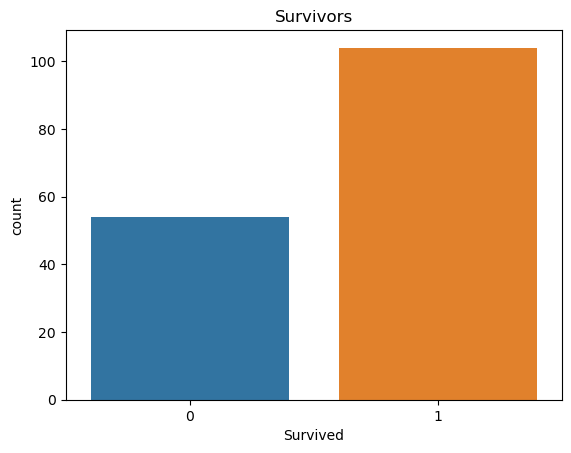

In [14]:
# Countplot of survivors
sns.countplot(x='Survived', data=cleaned_df)
plt.title('Survivors')
plt.show()

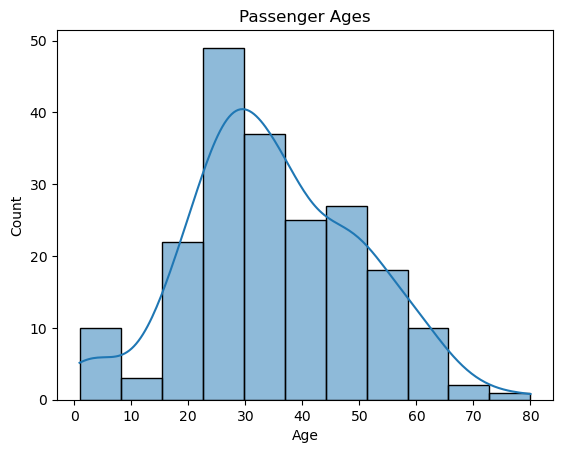

In [15]:
# Histogram of passenger ages
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Passenger Ages')
plt.show()

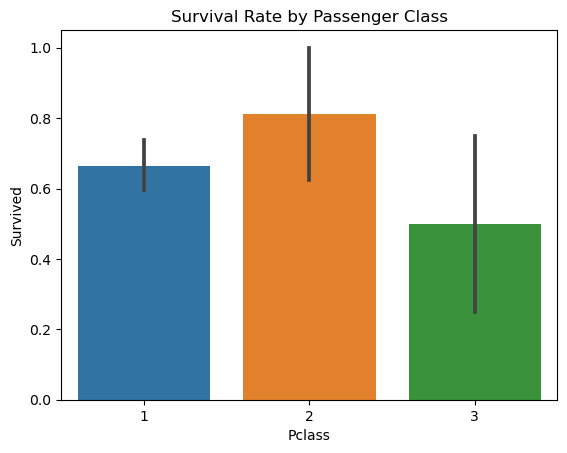

In [16]:
# Barplot of passenger classes
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Task 4 : Pivote Table

In [17]:
# Create a pivot table
pivot_table = pd.pivot_table(df, values='Survived', index='Sex', columns='Pclass', aggfunc='mean')

In [18]:
# Print the pivot table
print(pivot_table)

Pclass         1         2         3
Sex                                 
female  0.962963  0.900000  0.666667
male    0.410526  0.666667  0.333333


# Task 5 : Remove Duplication

In [19]:
# Identify duplicate rows
duplicates = cleaned_df.duplicated()

In [20]:
# Print the duplicate rows
print('Duplicate rows:')
print(cleaned_df[duplicates])

Duplicate rows:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [21]:
# Remove duplicate rows
cleaned_df = cleaned_df.drop_duplicates()

In [22]:
# Reset the index of the DataFrame
cleaned_df = cleaned_df.reset_index(drop=True)

# Print the cleaned data
print('Cleaned data:')
print(cleaned_df.shape)

Cleaned data:
(158, 12)


# Feature engineering

In [23]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1


# Select features and target variable

In [24]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
y = df['Survived']

# Convert categorical variables to numerical

In [25]:
X = pd.get_dummies(X)

# Split the data into training and test sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit LR model

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Predict on test set

In [28]:
y_pred = model.predict(X_test)

# Evaluate model

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:', accuracy)

Model Accuracy: 0.8536585365853658
